In [1]:
# upload the moving windows output from mu_p_ks_test
from google.colab import files
uploaded = files.upload()
import shutil
for filename in uploaded.keys():
    shutil.move(filename, filename)

Saving mu_p_values_5days.csv to mu_p_values_5days.csv


Detected 2 significant change points with p-value < 0.01:
Index: 23, KS Statistic: 0.6521739130434783, p-value: 0.03687423687423687
Index: 25, KS Statistic: 0.88, p-value: 0.012210012210012207


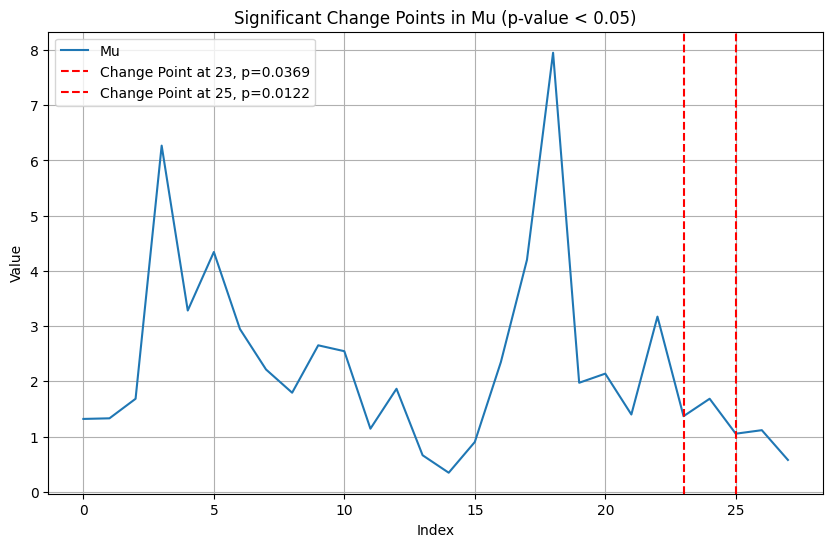

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import pandas as pd
# KS-twosample test
def detect_significant_change_points(data, significance_level=0.01):
    """
    Detect all change points in a time series with p-values below the significance level.

    Parameters:
    - data
    - significance_level: The p-value threshold for detecting significant change points

    Returns:
    - significant_points: List of tuples (index, ks_stat, p_value) for all significant change points
    """
    significant_points = []
    n = len(data)

    for i in range(1, n):
        sample1 = data[:i]
        sample2 = data[i:]

        # Apply the K-S test
        ks_stat, p_value = ks_2samp(sample1, sample2)
        # Check if the p-value is below the significance level
        if p_value < significance_level:
            significant_points.append((i, ks_stat, p_value))

    return significant_points

file_path = '/content/mu_p_values_5days.csv'
data = pd.read_csv(file_path)

# Extract the second column as the data: Mu; third column: p
mu_column = data.columns[1]
data_series = data[mu_column].values

# Significance level 0.05
significant_points = detect_significant_change_points(data_series, significance_level=0.05)
print(f"Detected {len(significant_points)} significant change points with p-value < 0.01:")
for index, ks_stat, p_value in significant_points:
    print(f"Index: {index}, KS Statistic: {ks_stat}, p-value: {p_value}")

plt.figure(figsize=(10, 6))
plt.plot(data_series, label=mu_column)
for index, ks_stat, p_value in significant_points:
    plt.axvline(index, color='red', linestyle='--', label=f'Change Point at {index}, p={p_value:.4f}')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title(f'Significant Change Points in {mu_column} (p-value < 0.05)')
plt.legend()
plt.grid(True)
plt.show()

Detected 1 significant change points with J'3 statistic:
Index: 25, J'3 Statistic: 1.44023807555755


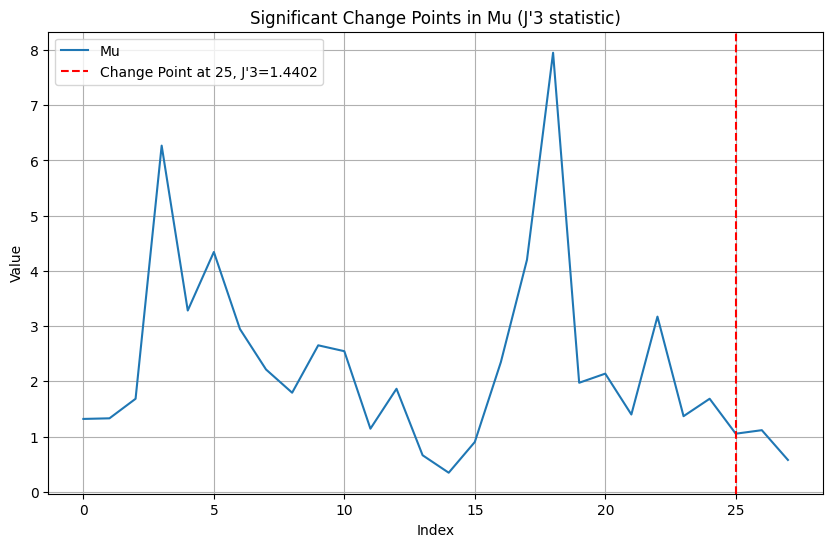

In [7]:
# J3-statistics
def calculate_j_prime3_statistic(sample1, sample2):
    """
    Calculate the J'3 statistic using the KS test.

    Parameters:
    - sample1: numpy array of the first sample (before the change point).
    - sample2: numpy array of the second sample (after the change point).

    Returns:
    - J'3: The calculated J'3 statistic.
    """
    m = len(sample1)
    n = len(sample2)
    d = np.gcd(m, n)  # Calculate the greatest common divisor

    # Perform the K-S test to get the maximum difference between the empirical CDFs
    ks_statistic, _ = ks_2samp(sample1, sample2)
    # Calculate J3 statistic using the K-S statistic and scaling factors
    J3 = (m * n / d)* ks_statistic
    # Calculate J'3 statistic
    J_prime3 = J3 * d / np.sqrt(m * n * (m + n))

    return J_prime3

def detect_significant_change_points_j_prime3(data, critical_value):
    """
    Detect all change points in a time series with J'3 statistic and compares it with a critical value.

    Parameters:
    - data
    - critical_value: The tabulated critical value for detecting significant change points

    Returns:
    - significant_points: List of tuples (index, J'3 statistic) for all significant change points
    """
    significant_points = []
    n = len(data)

    for i in range(1, n):
        sample1 = data[:i]
        sample2 = data[i:]

        # Calculate the J'3 statistic using the modified K-S test
        j_prime3_statistic = calculate_j_prime3_statistic(sample1, sample2)
        # Compare the j_prime3_statistic with the tabulated critical value
        if j_prime3_statistic > critical_value:
            significant_points.append((i, j_prime3_statistic))

    return significant_points

file_path = '/content/mu_p_values_5days.csv'
data = pd.read_csv(file_path)

mu_column = data.columns[1]
p_column = data.columns[2]
data_series = data[mu_column].values

# the critical value for J'3 (based on tabulated values)
critical_value = 1.36

# Detect all significant change points using J'3 statistic
significant_points = detect_significant_change_points_j_prime3(data_series, critical_value)

# Display the results
print(f"Detected {len(significant_points)} significant change points with J'3 statistic:")
for index, j_prime3_statistic in significant_points:
    print(f"Index: {index}, J'3 Statistic: {j_prime3_statistic}")

# Plotting the data with all detected significant change points
plt.figure(figsize=(10, 6))
plt.plot(data_series, label=mu_column)
for index, j_prime3_statistic in significant_points:
    plt.axvline(index, color='red', linestyle='--', label=f'Change Point at {index}, J\'3={j_prime3_statistic:.4f}')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title(f'Significant Change Points in {mu_column} (J\'3 statistic)')
plt.legend()
plt.grid(True)
plt.show()


Detected 0 significant change points with J'3 statistic:


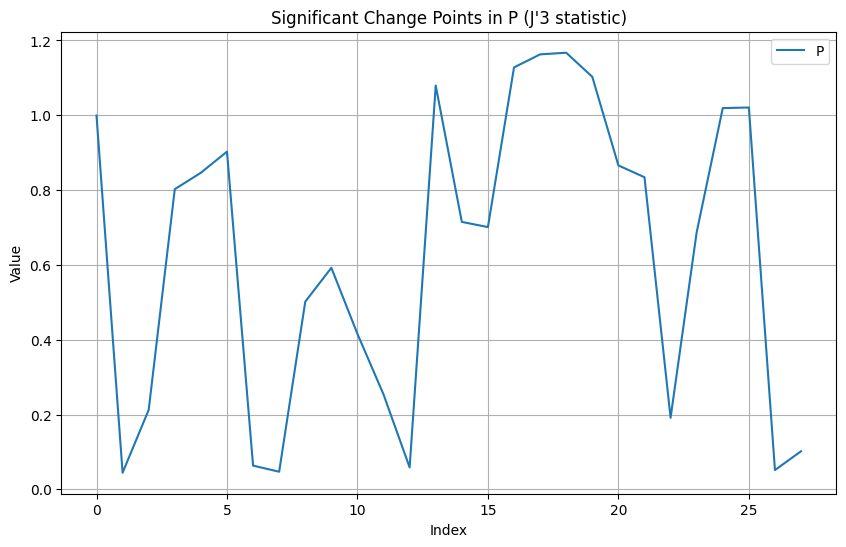

In [6]:
p_column = data.columns[2]
data_series = data[p_column].values

# the critical value for J'3 (based on tabulated values)
critical_value = 1.36

# Detect all significant change points using J'3 statistic
significant_points = detect_significant_change_points_j_prime3(data_series, critical_value)
print(f"Detected {len(significant_points)} significant change points with J'3 statistic:")
for index, j_prime3_statistic in significant_points:
    print(f"Index: {index}, J3 Statistic: {j_prime3_statistic}")

# Plotting the data with all detected significant change points
plt.figure(figsize=(10, 6))
plt.plot(data_series, label=p_column)
for index, j_prime3_statistic in significant_points:
    plt.axvline(index, color='red', linestyle='--', label=f'Change Point at {index}, J\'3={j_prime3_statistic:.4f}')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title(f'Significant Change Points in {p_column} (J\'3 statistic)')
plt.legend()
plt.grid(True)
plt.show()
